# 11 Sistemas de recomendación

- SR basados en contenido
- SR: Filtrado colaborativo

Basado en http://www.mmds.org/ capítulo 9

## Versión v.1

El notebook lo puedo modificar, esta versión es la v.1 a 09/02/2024 a las 2pm de Caracas.

## Aprendizaje Automático [UCV]

* Autor: Fernando Crema García
* Contacto: fernando.cremagarcia@kuleuven.be; fernando.cremagarcia@esat.kuleuven.be

---

# Definición

En muchos casos, queremos predecir la respuestas de usuarios ante un conjunto de opciones. El área de aprendizaje automático que responde esta situación se conoce como sistemas de recomendación.

Ejemplos:

1. Cuál artículo de noticias te podrá gustar en base a los artículos que has leído?
1. Dado un catálogo de productos. Cuál es el producto que podría gustarte con mayor probabilidad?
1. Crear un conjunto de opciones de acuerdo al perfil de un usuario.

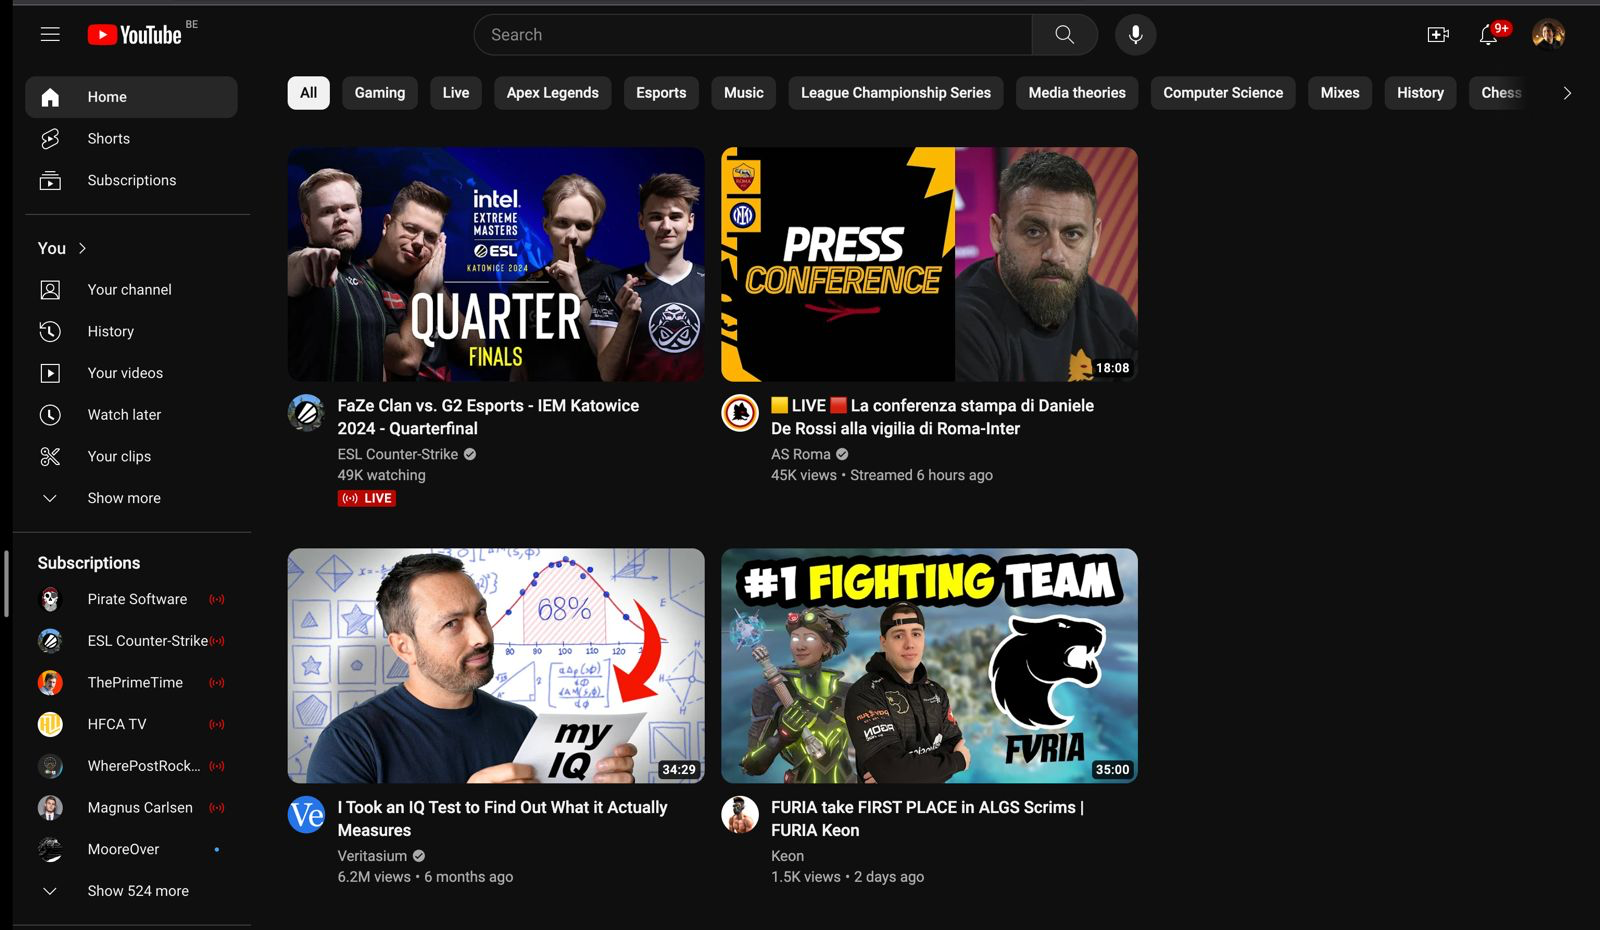

Incrementar la probabilidad de venta incentivando búsquedas previas

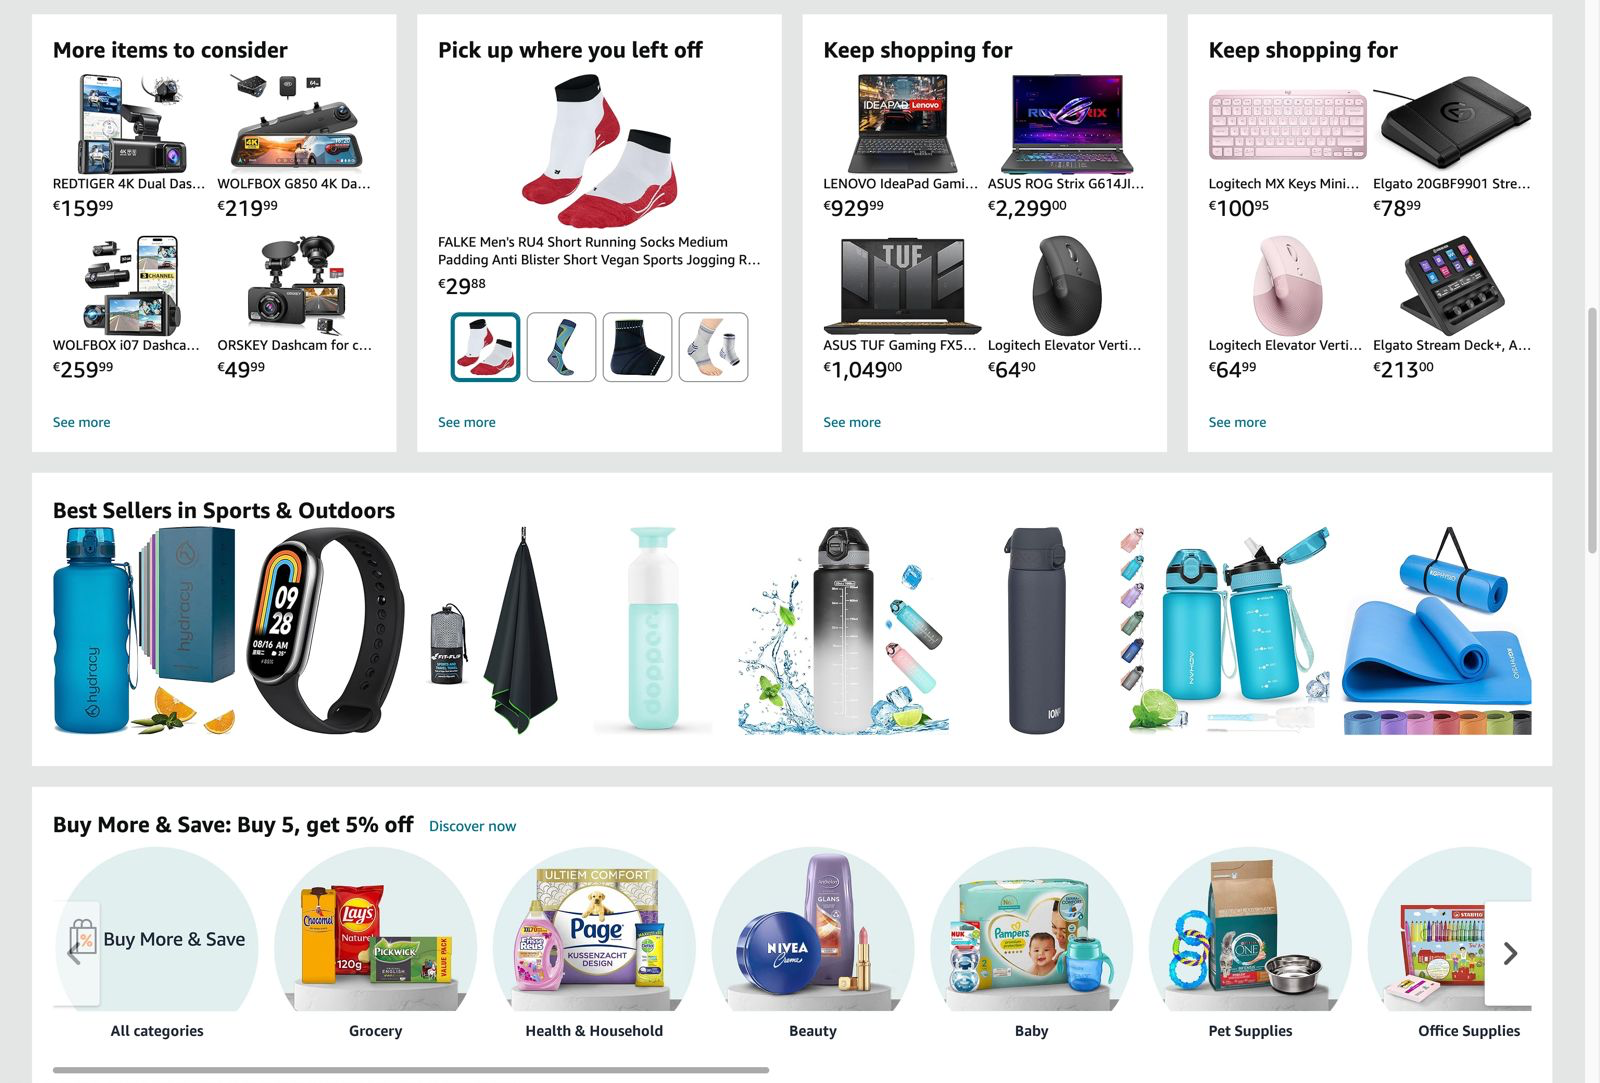

Recomendar "usuarios average" cuando un usuario nuevo accede a tu plataforma

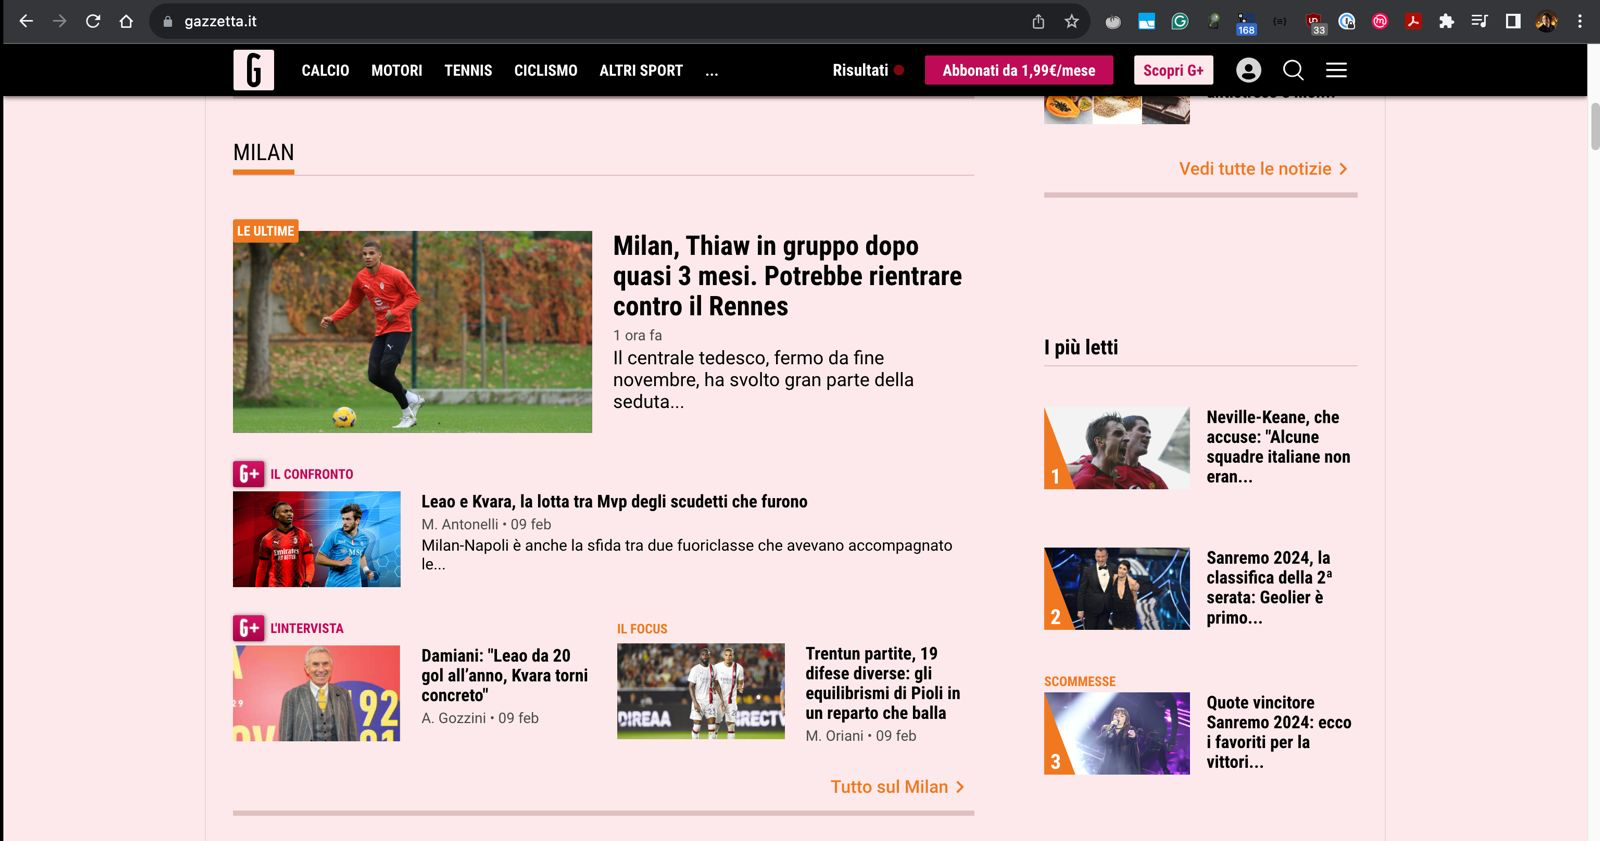

Pero comenzar a predecir una vez que recopilamos información del usuario

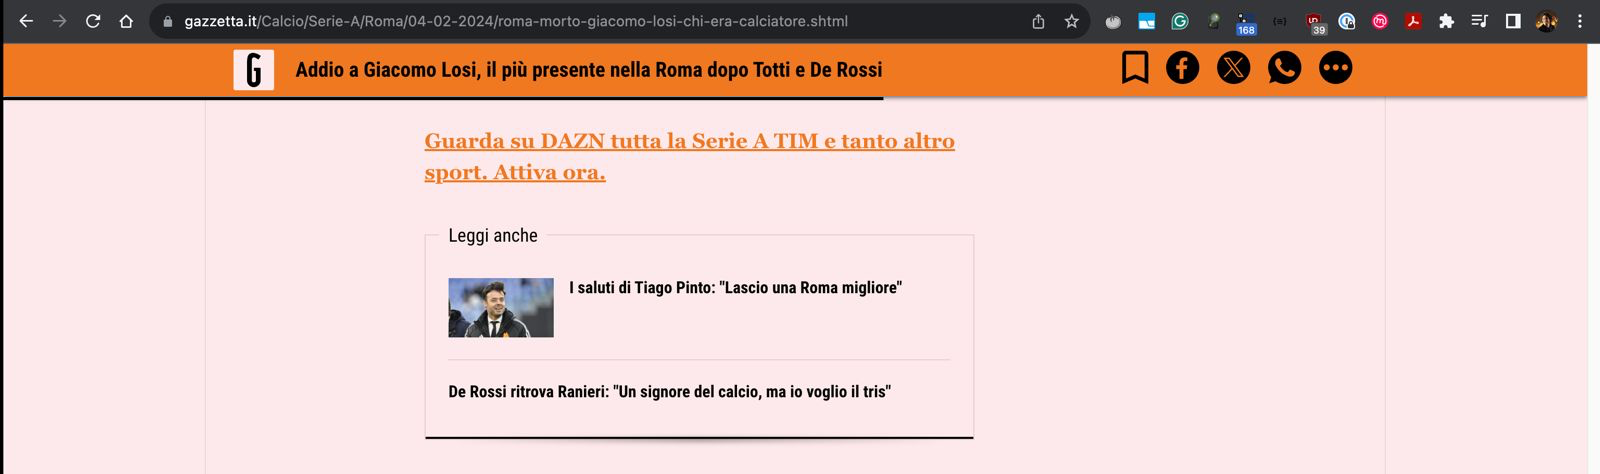

Incrementar la probabilidad de venta incentivando búsquedas previas

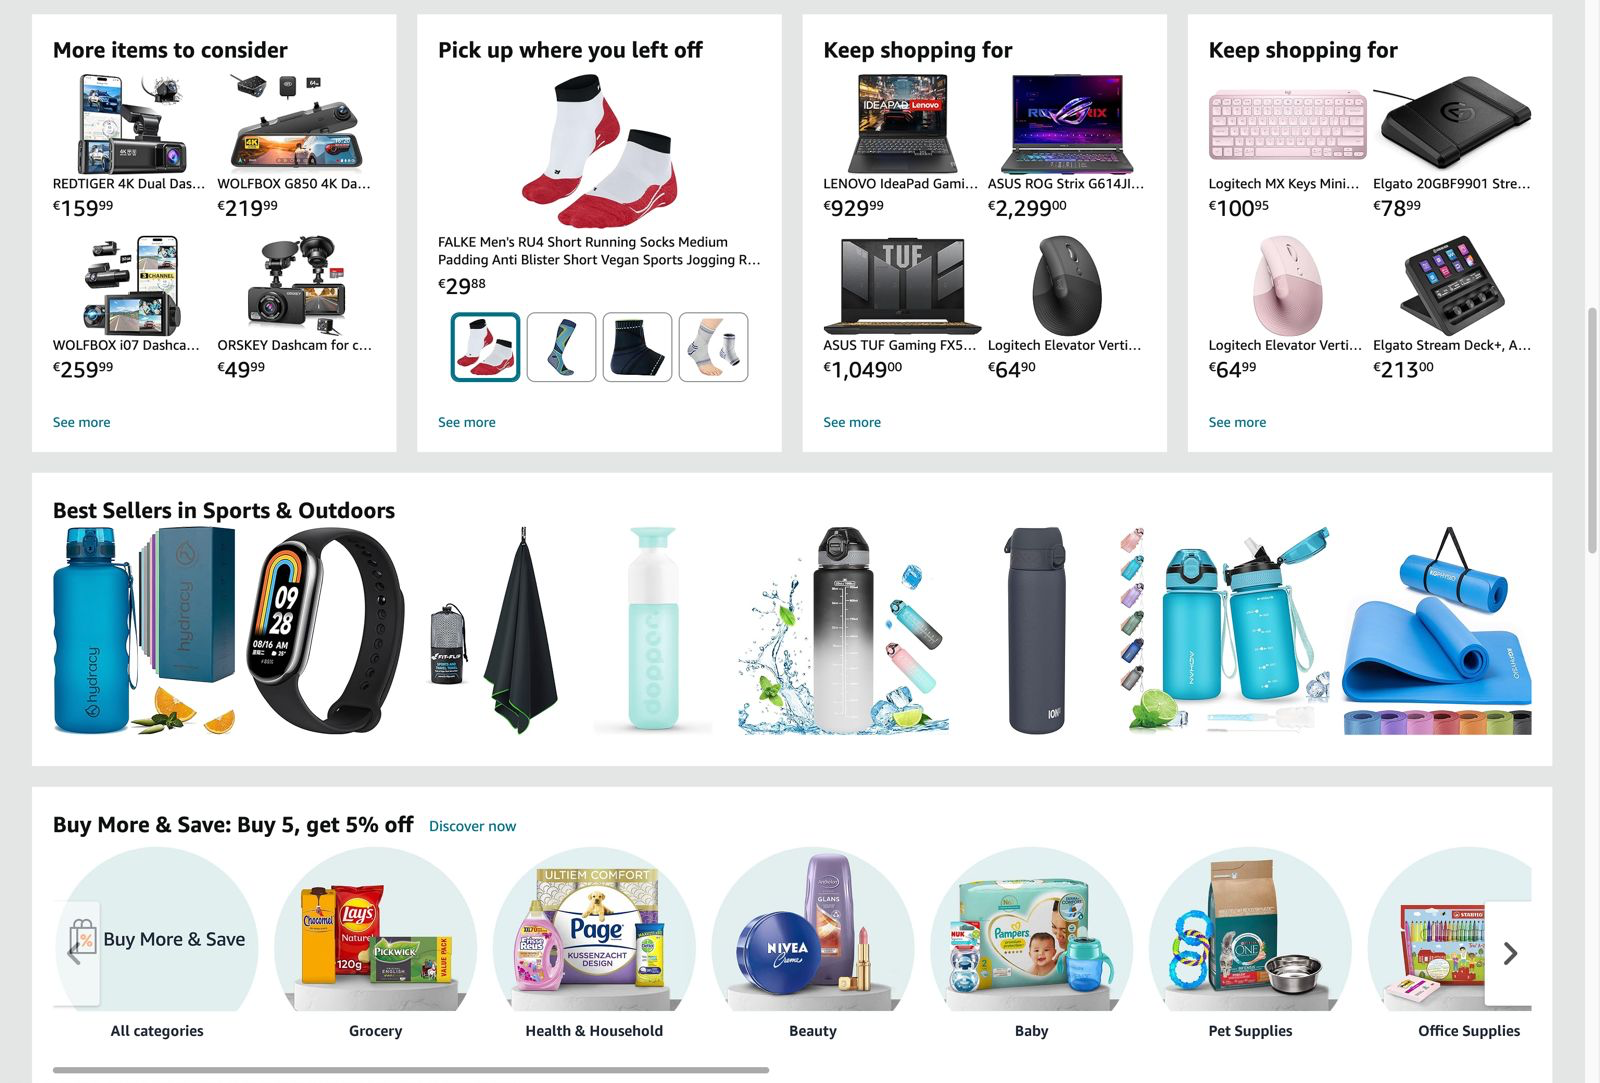

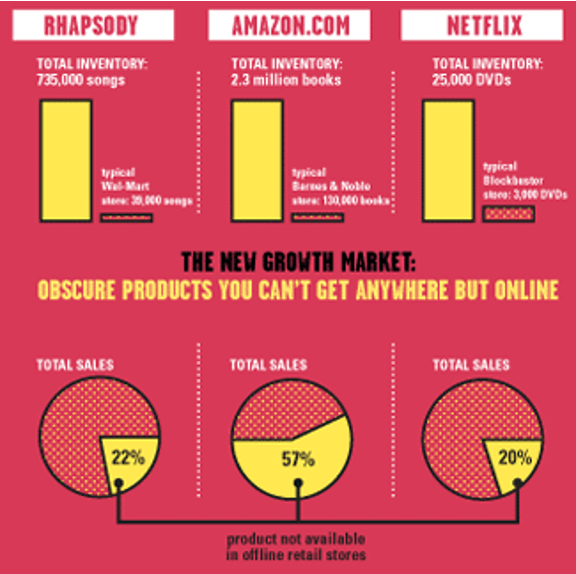

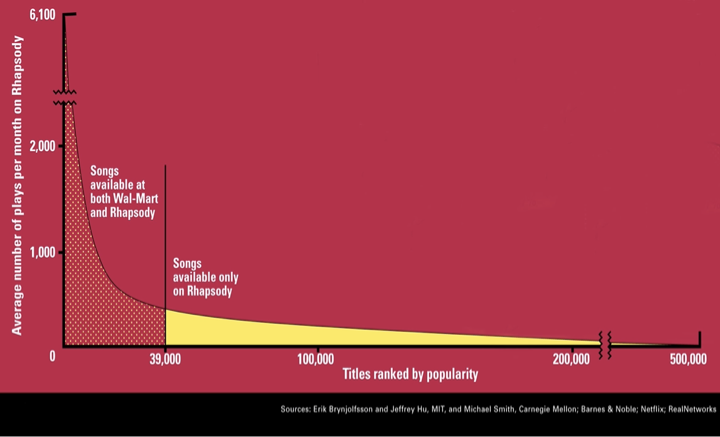

## Noción del modelo a deducir

Sean: $$X = \text{ Conjunto de usuarios}$$ y $$ S = \text{ Conjunto de productos disponibles}$$ buscamos una función de **utilidad** definida como: $$u: X \times S \rightarrow R$$ de donde $$R \text{ conjunto de evaluaciones (ratings)} $$

Por ejemplo,

- En Amazon de 1 a 5 estrellas.
- En Netflix, me gusta o no me gusta.
- En X (antes Twitter), me gusta o no me gusta.
- En Rotten tomatoes?



### La matriz de utilidad

|       | Inception | Batman Begins | Matrix | Saving Private Ryan | Dunkirk |
|:-----:|:---------:|:-------------:|:------:|:-------------------:|:-------:|
| Alice |     1     |               |   0.2  |         0.8         |         |
|  Bob  |      0     |      0.8      |        |         0.1         |         |
| Carol |    0.2    |               |        |                     |   0.9   |
| David |           |               |   0.4  |                     |         |

### Problemas básicos

1. Cómo conseguimos la matriz de ratings? Cómo podemos conseguir los datos?
1. Cómo podemos extrapolar en datos desconocidos? La matriz de ratings por lo general qué forma tendrá?
1. Cómo podemos medir el rendimiento de un método de recomendación?

### Obteniendo información

#### Explícito

1. Preguntar a usuarios los ratings
1. Almacenar información de interacción
1. En general muy complicado de conseguir, por qué?

#### Implícito

1. Aprender ratings en base a acciones
1. Qué sucede con ratings bajos?

### Cómo es la función de utilidad?

- La matriz $U$ por lo general es sparse!!

# Sistemas de recomendación basada en contenido

## Idea principal

Sea $x$ un usuario, conseguir ítems en base a información previa y similar que $x$ haya evaluado positivamente.

Ejemplos:

- Netflix recomienda películas de guerra a un usuario que haya visto un documental de WWII.
- Spotify recomienda una canción de Gorillaz a alguien que escuche Blur?

## Aspectos positivos

- No necesitamos datos de otros usuarios.
- Es posible recomendar a usuarios con gustos únicos.
- Es posible recomendar en base a items nuevos.
- Es posible explicar, en base al contenido, por qué la recomendación es apropiada.

## Aspectos negativos

- Conseguir "el contenido" puede resultar bastante complicado.
- Recomendaciones para usuarios nuevos?
- "Overfitting"? "Overspecialization"

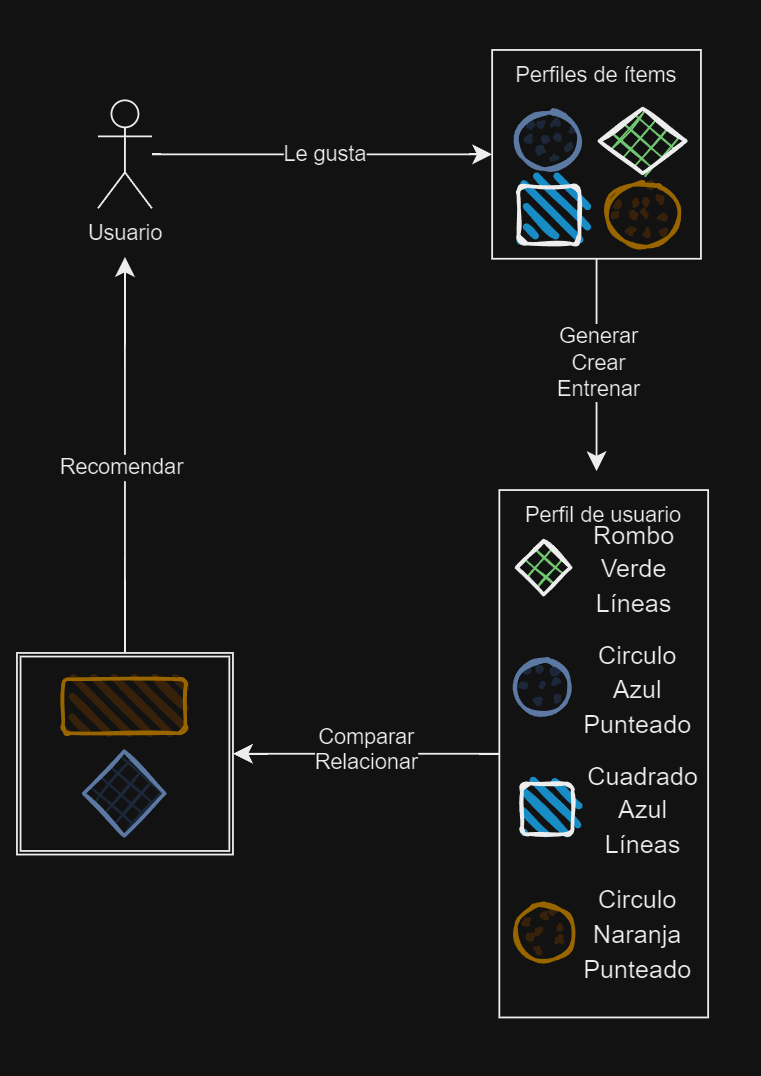

## Técnica de ejemplo: Perfiles de ítems

Sea $f_{ij}$ la frecuencia de un término (característica) $i$ en un documento (ítem) $j$

Si comparamos respecto al resto de términos, tenemos la métrica final: $$TF_{ij}=\frac{f_{ij}}{max
_k f_{kj}}$$

Sin embargo, podemos tener limitaciones en algunos casos: cuáles?



### Normalizando $f_{ij}$

Podemos crear un término conocido como frecuencia inversa de documentos como: $$IDF_{ij} = log\frac{N}{n_i}$$ que nos mide la fuerza relativa del término $i$ respecto a todos los documentos.

Luego, el score del término normalizado sería:

$$w_{ij} = TF_{ij} \text{  } IDF_i$$

Para un documento $j$ calculamos todos los valores $w_{ij}$ y de esta manera tenemos el **perfil** del documento

### Ejemplo con texto y $w_{ij}$

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'Nuestro primer documento',
    'Los documento contienen palabras',
    'El primer hijo firmó un documento',
    'Nuestro segundo documento',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
print(X.shape)

(4, 11)


In [69]:
feature_names = vectorizer.get_feature_names_out()
corpus_index = [n for n in corpus]
import pandas as pd
df = pd.DataFrame(X.T.todense(), index=feature_names, columns=corpus_index)
df

Nuestro primer documento  Los documento contienen palabras  \
contienen                  0.000000                          0.552805   
documento                  0.423897                          0.288477   
el                         0.000000                          0.000000   
firmó                      0.000000                          0.000000   
hijo                       0.000000                          0.000000   
los                        0.000000                          0.552805   
nuestro                    0.640434                          0.000000   
palabras                   0.000000                          0.552805   
primer                     0.640434                          0.000000   
segundo                    0.000000                          0.000000   
un                         0.000000                          0.000000   

           El primer hijo firmó un documento  Nuestro segundo documento  
contienen                           0.000000                   0.000000  
documento                           0.235891                   0.379192  
el                                  0.452035                   0.000000  
firmó                               0.452035                   0.000000  
hijo                                0.452035                   0.000000  
los                                 0.000000                   0.000000  
nuestro                             0.000000                   0.572892  
palabras                            0.000000                   0.000000  
primer                              0.356389                   0.000000  
segundo                             0.000000                   0.726641  
un                                  0.452035                   0.000000

In [70]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_ej = cosine_similarity(X)


In [ ]:
corpus = [
    'Nuestro primer documento',
    'Los documentos contienen palabras',
    'El primer hijo firmó un documento',
    'Nuestro segundo documento',
]

In [71]:
cosine_similarity_ej

array([[1.        , 0.12228435, 0.32823721, 0.52763798],
       [0.12228435, 1.        , 0.06804894, 0.10938798],
       [0.32823721, 0.06804894, 1.        , 0.08944774],
       [0.52763798, 0.10938798, 0.08944774, 1.        ]])

### Wikipedia

Vamos a hacer un ejemplo de "la vida real".

Una agencia de viajes conoce los destinos a los cuáles puede ofrecer paquetes turísticos. Un usuario quiere conocer qué ciudades se pueden visitar dada una ciudad que les gusta.

In [ ]:
!pip install wikipedia

In [ ]:
import pandas as pd

#### Todo el texto

In [96]:
ciudades = [
    "Nueva York", "Los Angeles", "Roma", "Madrid", "Londres", "Caracas", "Bogotá",
    "Arepa", "Pasta", "Pizza", "Hot Dog", "Cocido", "Fish and Chips", "Fontana de Trevi"
]

In [97]:
import wikipedia
from sklearn.feature_extraction.text import TfidfVectorizer

wikipedia.set_lang("es")

corpus = []

for ciudad in ciudades:
  corpus.append(str(wikipedia.page(ciudad).content))

In [98]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['00', '000', '002', ..., 'پیتزای', 'ῤώμη', 'ῥέω'], dtype=object)

In [99]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_cities = cosine_similarity(X)

In [100]:
cosine_similarity_cities

array([[1.        , 0.89827278, 0.89980791, 0.91432423, 0.89437464,
        0.8980436 , 0.91088589, 0.78976632, 0.7843454 , 0.71352555,
        0.78859673, 0.68563165, 0.54451945, 0.78475793],
       [0.89827278, 1.        , 0.86352194, 0.87115911, 0.85265732,
        0.85753558, 0.86811827, 0.74879322, 0.74528237, 0.65974896,
        0.74216427, 0.64407848, 0.52434734, 0.74139987],
       [0.89980791, 0.86352194, 1.        , 0.91706336, 0.88069796,
        0.90100887, 0.90677487, 0.78501399, 0.76609186, 0.72329854,
        0.76126316, 0.67443115, 0.5377136 , 0.82111761],
       [0.91432423, 0.87115911, 0.91706336, 1.        , 0.89297407,
        0.91011107, 0.92003969, 0.79971801, 0.78177735, 0.71640405,
        0.78187168, 0.68867224, 0.54191366, 0.79995416],
       [0.89437464, 0.85265732, 0.88069796, 0.89297407, 1.        ,
        0.87655493, 0.88761026, 0.76790812, 0.75464225, 0.6973239 ,
        0.75881406, 0.6652047 , 0.55134685, 0.76885151],
       [0.8980436 , 0.85753558, 0.9

#### Creando un dataframe

In [101]:
similarity_df = pd.DataFrame(cosine_similarity_cities, index=ciudades, columns=ciudades)

In [102]:
similarity_df

Nueva York  Los Angeles      Roma    Madrid   Londres  \
Nueva York          1.000000     0.898273  0.899808  0.914324  0.894375   
Los Angeles         0.898273     1.000000  0.863522  0.871159  0.852657   
Roma                0.899808     0.863522  1.000000  0.917063  0.880698   
Madrid              0.914324     0.871159  0.917063  1.000000  0.892974   
Londres             0.894375     0.852657  0.880698  0.892974  1.000000   
Caracas             0.898044     0.857536  0.901009  0.910111  0.876555   
Bogotá              0.910886     0.868118  0.906775  0.920040  0.887610   
Arepa               0.789766     0.748793  0.785014  0.799718  0.767908   
Pasta               0.784345     0.745282  0.766092  0.781777  0.754642   
Pizza               0.713526     0.659749  0.723299  0.716404  0.697324   
Hot Dog             0.788597     0.742164  0.761263  0.781872  0.758814   
Cocido              0.685632     0.644078  0.674431  0.688672  0.665205   
Fish and Chips      0.544519     0.524347  0.537714  0.541914  0.551347   
Fontana de Trevi    0.784758     0.741400  0.821118  0.799954  0.768852   

                   Caracas    Bogotá     Arepa     Pasta     Pizza   Hot Dog  \
Nueva York        0.898044  0.910886  0.789766  0.784345  0.713526  0.788597   
Los Angeles       0.857536  0.868118  0.748793  0.745282  0.659749  0.742164   
Roma              0.901009  0.906775  0.785014  0.766092  0.723299  0.761263   
Madrid            0.910111  0.920040  0.799718  0.781777  0.716404  0.781872   
Londres           0.876555  0.887610  0.767908  0.754642  0.697324  0.758814   
Caracas           1.000000  0.908701  0.796560  0.762498  0.704379  0.762091   
Bogotá            0.908701  1.000000  0.811416  0.777204  0.718220  0.779487   
Arepa             0.796560  0.811416  1.000000  0.709807  0.662110  0.714693   
Pasta             0.762498  0.777204  0.709807  1.000000  0.661712  0.725288   
Pizza             0.704379  0.718220  0.662110  0.661712  1.000000  0.688529   
Hot Dog           0.762091  0.779487  0.714693  0.725288  0.688529  1.000000   
Cocido            0.674816  0.685505  0.621781  0.651060  0.593106  0.672349   
Fish and Chips    0.530872  0.546677  0.493617  0.494593  0.452766  0.534854   
Fontana de Trevi  0.780729  0.790697  0.702317  0.694507  0.686494  0.702067   

                    Cocido  Fish and Chips  Fontana de Trevi  
Nueva York        0.685632        0.544519          0.784758  
Los Angeles       0.644078        0.524347          0.741400  
Roma              0.674431        0.537714          0.821118  
Madrid            0.688672        0.541914          0.799954  
Londres           0.665205        0.551347          0.768852  
Caracas           0.674816        0.530872          0.780729  
Bogotá            0.685505        0.546677          0.790697  
Arepa             0.621781        0.493617          0.702317  
Pasta             0.651060        0.494593          0.694507  
Pizza             0.593106        0.452766          0.686494  
Hot Dog           0.672349        0.534854          0.702067  
Cocido            1.000000        0.459222          0.616822  
Fish and Chips    0.459222        1.000000          0.475797  
Fontana de Trevi  0.616822        0.475797          1.000000

#### Recomendando una ciudad

In [92]:
ciudad = input('Qué ciudad te gustaría conocer?')

Qué ciudad te gustaría conocer?Caracas


In [94]:
# Encontrar índice de la ciudad en el df
ciudad_index = similarity_df.index.get_loc(ciudad)

# Decidir el numero de ciudades
top = 4

# Encontrar las mejores recomendaciones
top_X = similarity_df.iloc[ciudad_index].sort_values(ascending=False)[1:(top+1)]

# Imprimir las ciudades
print(f'Top {top} ciudades a {ciudad}:')
print(top_X)

Top 4 ciudades a Caracas:
Madrid        0.914509
Bogotá        0.913191
Roma          0.902852
Nueva York    0.901086
Name: Caracas, dtype: float64


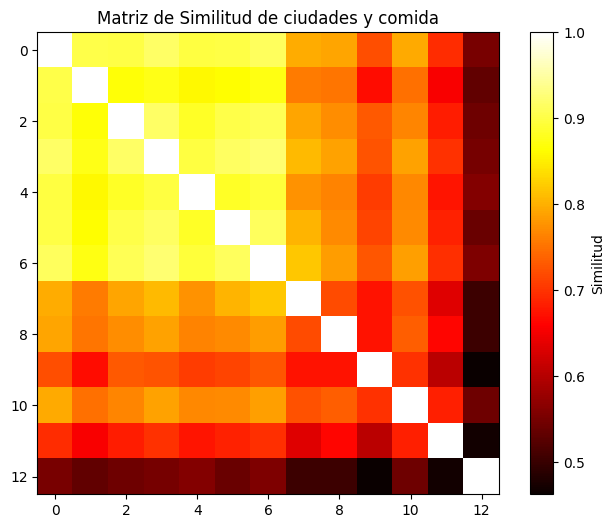

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.imshow(similarity_df, cmap='hot', interpolation='nearest')
plt.colorbar(label='Similitud')
plt.title('Matriz de Similitud de ciudades y comida')
plt.show()

#### Summary

In [103]:
import wikipedia
from sklearn.feature_extraction.text import TfidfVectorizer

wikipedia.set_lang("es")

corpus_summ = []

for ciudad in ciudades:
  corpus_summ.append(str(wikipedia.summary(ciudad, sentences=1)))

In [104]:
vectorizer_summ = TfidfVectorizer()
X_summ = vectorizer_summ.fit_transform(corpus_summ)

In [105]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity_cities_summ = cosine_similarity(X_summ)

In [106]:
cosine_similarity_cities_summ

array([[1.        , 0.47218556, 0.1956811 , 0.13807804, 0.22700372,
        0.29019578, 0.16049057, 0.20170282, 0.09755761, 0.15206343,
        0.2062995 , 0.11692807, 0.11390397, 0.15774089],
       [0.47218556, 1.        , 0.16235084, 0.12609572, 0.1927429 ,
        0.22852312, 0.10796484, 0.10703016, 0.06266419, 0.08296695,
        0.16962516, 0.11078279, 0.08351277, 0.09226514],
       [0.1956811 , 0.16235084, 1.        , 0.1798998 , 0.16954077,
        0.22863323, 0.19926859, 0.13903564, 0.07588752, 0.08361315,
        0.16169173, 0.06986438, 0.07041026, 0.24266833],
       [0.13807804, 0.12609572, 0.1798998 , 1.        , 0.10894939,
        0.11241766, 0.05809795, 0.11354838, 0.09255804, 0.09678421,
        0.08399881, 0.07681218, 0.08872271, 0.07013652],
       [0.22700372, 0.1927429 , 0.16954077, 0.10894939, 1.        ,
        0.30635301, 0.13218428, 0.1431209 , 0.0936952 , 0.117993  ,
        0.21700399, 0.14064119, 0.18990091, 0.12185206],
       [0.29019578, 0.22852312, 0.2

In [107]:
similarity_df_summ = pd.DataFrame(cosine_similarity_cities_summ, index=ciudades, columns=ciudades)

In [108]:
similarity_df_summ

Nueva York  Los Angeles      Roma    Madrid   Londres  \
Nueva York          1.000000     0.472186  0.195681  0.138078  0.227004   
Los Angeles         0.472186     1.000000  0.162351  0.126096  0.192743   
Roma                0.195681     0.162351  1.000000  0.179900  0.169541   
Madrid              0.138078     0.126096  0.179900  1.000000  0.108949   
Londres             0.227004     0.192743  0.169541  0.108949  1.000000   
Caracas             0.290196     0.228523  0.228633  0.112418  0.306353   
Bogotá              0.160491     0.107965  0.199269  0.058098  0.132184   
Arepa               0.201703     0.107030  0.139036  0.113548  0.143121   
Pasta               0.097558     0.062664  0.075888  0.092558  0.093695   
Pizza               0.152063     0.082967  0.083613  0.096784  0.117993   
Hot Dog             0.206300     0.169625  0.161692  0.083999  0.217004   
Cocido              0.116928     0.110783  0.069864  0.076812  0.140641   
Fish and Chips      0.113904     0.083513  0.070410  0.088723  0.189901   
Fontana de Trevi    0.157741     0.092265  0.242668  0.070137  0.121852   

                   Caracas    Bogotá     Arepa     Pasta     Pizza   Hot Dog  \
Nueva York        0.290196  0.160491  0.201703  0.097558  0.152063  0.206300   
Los Angeles       0.228523  0.107965  0.107030  0.062664  0.082967  0.169625   
Roma              0.228633  0.199269  0.139036  0.075888  0.083613  0.161692   
Madrid            0.112418  0.058098  0.113548  0.092558  0.096784  0.083999   
Londres           0.306353  0.132184  0.143121  0.093695  0.117993  0.217004   
Caracas           1.000000  0.227387  0.214257  0.118109  0.153128  0.287502   
Bogotá            0.227387  1.000000  0.135513  0.053899  0.068692  0.113905   
Arepa             0.214257  0.135513  1.000000  0.094803  0.211327  0.213071   
Pasta             0.118109  0.053899  0.094803  1.000000  0.268941  0.214231   
Pizza             0.153128  0.068692  0.211327  0.268941  1.000000  0.255382   
Hot Dog           0.287502  0.113905  0.213071  0.214231  0.255382  1.000000   
Cocido            0.221721  0.055167  0.097615  0.220417  0.233276  0.243489   
Fish and Chips    0.242337  0.053378  0.088639  0.093222  0.154883  0.203286   
Fontana de Trevi  0.153765  0.083137  0.105631  0.080313  0.163554  0.151503   

                    Cocido  Fish and Chips  Fontana de Trevi  
Nueva York        0.116928        0.113904          0.157741  
Los Angeles       0.110783        0.083513          0.092265  
Roma              0.069864        0.070410          0.242668  
Madrid            0.076812        0.088723          0.070137  
Londres           0.140641        0.189901          0.121852  
Caracas           0.221721        0.242337          0.153765  
Bogotá            0.055167        0.053378          0.083137  
Arepa             0.097615        0.088639          0.105631  
Pasta             0.220417        0.093222          0.080313  
Pizza             0.233276        0.154883          0.163554  
Hot Dog           0.243489        0.203286          0.151503  
Cocido            1.000000        0.165389          0.090836  
Fish and Chips    0.165389        1.000000          0.097531  
Fontana de Trevi  0.090836        0.097531          1.000000

In [ ]:
ciudad = input('Qué ciudad te gustaría conocer?')

Qué ciudad te gustaría conocer?Bogotá


#### Recomendando de nuevo

In [ ]:
# Encontrar índice de la ciudad en el df
ciudad_index = similarity_df_summ.index.get_loc(ciudad)

# Decidir el numero de ciudades
top = 2

# Encontrar las mejores recomendaciones
top_X = similarity_df_summ.iloc[ciudad_index].sort_values(ascending=False)[1:(top+1)]

# Imprimir las ciudades
print(f'Top {top} ciudades a {ciudad}:')
print(top_X)

Top 2 ciudades a Bogotá:
Caracas     0.277193
New York    0.230311
Name: Bogotá, dtype: float64


### Mejorando la matriz de similaridad

In [109]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

# Descargar stopwords para español
nltk.download('stopwords')
nltk.download('punkt')

# Definir las stopwords en español
stop_words = set(stopwords.words('spanish'))

# Definir el stemmer para español
stemmer = SnowballStemmer('spanish')

# Texto de ejemplo en español
texto_ejemplo = "El rápido zorro marrón saltó sobre el perro perezoso. Los perros blancos perezosos. Una persona de Caracas"

# Tokenizar el texto
palabras = word_tokenize(texto_ejemplo, language='spanish')

# Eliminar stopwords y realizar stemming
palabras_filtradas = [stemmer.stem(palabra) for palabra in palabras if palabra.lower() not in stop_words]

# Imprimir las palabras filtradas
print("Palabras filtradas y stemming aplicado:")
print(palabras_filtradas)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Palabras filtradas y stemming aplicado:
['rap', 'zorr', 'marron', 'salt', 'perr', 'perez', '.', 'perr', 'blanc', 'perez', '.', 'person', 'carac']


#### Agregando técnicas de NLP a nuestro ejemplo con content

In [110]:
import wikipedia
from sklearn.feature_extraction.text import TfidfVectorizer

wikipedia.set_lang("es")

corpus_nlp = []

for ciudad in ciudades:
  # Tokenizar el texto
  palabras = word_tokenize(str(wikipedia.page(ciudad).content), language='spanish')

  # Eliminar stopwords y realizar stemming
  palabras_filtradas = [stemmer.stem(palabra) for palabra in palabras if palabra.lower() not in stop_words]

  # Concatenar las palabras usando espacio
  corpus_nlp.append(" ".join(palabras_filtradas))

In [111]:
vectorizer_nlp = TfidfVectorizer()
X_nlp = vectorizer.fit_transform(corpus_nlp)

In [112]:
cosine_similarity_cities_nlp = cosine_similarity(X_nlp)

In [113]:
similarity_df_nlp = pd.DataFrame(cosine_similarity_cities_nlp, index=ciudades, columns=ciudades)

In [114]:
similarity_df_nlp

Nueva York  Los Angeles      Roma    Madrid   Londres  \
Nueva York          1.000000     0.388359  0.273080  0.263537  0.309633   
Los Angeles         0.388359     1.000000  0.241541  0.225363  0.265972   
Roma                0.273080     0.241541  1.000000  0.283628  0.222996   
Madrid              0.263537     0.225363  0.283628  1.000000  0.227221   
Londres             0.309633     0.265972  0.222996  0.227221  1.000000   
Caracas             0.279741     0.242428  0.243755  0.246287  0.224706   
Bogotá              0.304266     0.264567  0.254952  0.268307  0.242609   
Arepa               0.073739     0.062525  0.060631  0.061670  0.047015   
Pasta               0.087354     0.081168  0.115079  0.072262  0.063763   
Pizza               0.092629     0.069125  0.090275  0.063509  0.057117   
Hot Dog             0.100683     0.067521  0.061962  0.059617  0.056886   
Cocido              0.039715     0.031108  0.048914  0.051132  0.033344   
Fish and Chips      0.071040     0.062235  0.059400  0.046284  0.094447   
Fontana de Trevi    0.117302     0.081800  0.284854  0.125271  0.084635   

                   Caracas    Bogotá     Arepa     Pasta     Pizza   Hot Dog  \
Nueva York        0.279741  0.304266  0.073739  0.087354  0.092629  0.100683   
Los Angeles       0.242428  0.264567  0.062525  0.081168  0.069125  0.067521   
Roma              0.243755  0.254952  0.060631  0.115079  0.090275  0.061962   
Madrid            0.246287  0.268307  0.061670  0.072262  0.063509  0.059617   
Londres           0.224706  0.242609  0.047015  0.063763  0.057117  0.056886   
Caracas           1.000000  0.307564  0.140601  0.081611  0.064225  0.066382   
Bogotá            0.307564  1.000000  0.155012  0.081291  0.063454  0.068630   
Arepa             0.140601  0.155012  1.000000  0.092827  0.077250  0.076019   
Pasta             0.081611  0.081291  0.092827  1.000000  0.128884  0.088619   
Pizza             0.064225  0.063454  0.077250  0.128884  1.000000  0.149855   
Hot Dog           0.066382  0.068630  0.076019  0.088619  0.149855  1.000000   
Cocido            0.045653  0.050836  0.072982  0.127987  0.088732  0.149994   
Fish and Chips    0.040269  0.042310  0.040527  0.049870  0.066509  0.099095   
Fontana de Trevi  0.087026  0.092043  0.035494  0.059295  0.054592  0.045268   

                    Cocido  Fish and Chips  Fontana de Trevi  
Nueva York        0.039715        0.071040          0.117302  
Los Angeles       0.031108        0.062235          0.081800  
Roma              0.048914        0.059400          0.284854  
Madrid            0.051132        0.046284          0.125271  
Londres           0.033344        0.094447          0.084635  
Caracas           0.045653        0.040269          0.087026  
Bogotá            0.050836        0.042310          0.092043  
Arepa             0.072982        0.040527          0.035494  
Pasta             0.127987        0.049870          0.059295  
Pizza             0.088732        0.066509          0.054592  
Hot Dog           0.149994        0.099095          0.045268  
Cocido            1.000000        0.064864          0.034557  
Fish and Chips    0.064864        1.000000          0.043311  
Fontana de Trevi  0.034557        0.043311          1.000000

In [ ]:
ciudad = input('Qué ciudad te gustaría conocer?')

Qué ciudad te gustaría conocer?Bogotá


In [ ]:
# Encontrar índice de la ciudad en el df
ciudad_index = similarity_df_nlp.index.get_loc(ciudad)

# Decidir el numero de ciudades
top = 4

# Encontrar las mejores recomendaciones
top_X = similarity_df_nlp.iloc[ciudad_index].sort_values(ascending=False)[1:(top+1)]

# Imprimir las ciudades
print(f'Top {top} ciudades a {ciudad}:')
print(top_X)

Top 4 ciudades a Bogotá:
Caracas        0.295440
New York       0.295052
Madrid         0.278633
Los Angeles    0.268648
Name: Bogotá, dtype: float64


### Cómo podemos crear un perfil de usuario?

Depende de la matriz de utilidad!!

Supongan un usuario $x$ ve las siguientes películas con sus respectivos directores:

|                   | Inception | Batman Begins | Matrix | Saving Private Ryan | Dunkirk |
|:-----------------:|:---------:|:-------------:|:------:|:-------------------:|:-------:|
| Christopher Nolan |     1     |       1       |    0   |          0          |    1    |
|  Steven Spielberg |     0     |       0       |    0   |          1          |    0    |
|   L. Wachowski's  |     0     |       0       |    1   |          0          |    0    |







# Filtrado colaborativo

## Idea Principal

En el caso de filtrado colaborativo, buscamos los intereses de un usuario basándose en las preferencias de una población de usuarios. La idea es que si dos usuarios han tenido intereses similares en el pasado, entonces las recomendaciones basadas en las preferencias del uno podrían ser relevantes para el otro.

Existen dos enfoques principales:

- **Filtrado colaborativo basado en usuarios:** Se buscan usuarios similares al usuario objetivo y se le recomiendan ítems que esos usuarios similares han valorado positivamente.
- **Filtrado colaborativo basado en ítems:** Se recomiendan ítems similares a aquellos que el usuario ya ha valorado positivamente, basándose en las valoraciones de todos los usuarios.

## Aspectos Positivos

1. **Personalización:** Ofrece recomendaciones personalizadas basadas en el comportamiento del usuario, mejorando la experiencia del usuario.
2. **Descubrimiento:** Ayuda a los usuarios a descubrir productos o contenidos que podrían no haber encontrado por sí mismos.
3. **Escalabilidad:** Puede manejar una gran cantidad de usuarios e ítems, haciendo escalables las recomendaciones.

## Aspectos Negativos

1. **Inicio frío:** Dificultad para recomendar a nuevos usuarios o ítems debido a la falta de datos históricos (problema de inicio frío).
2. **Sesgo de popularidad:** Tendencia a recomendar ítems populares, ignorando opciones menos conocidas pero potencialmente relevantes.
3. **Problemas de privacidad:** El análisis detallado del comportamiento del usuario puede plantear preocupaciones sobre la privacidad y el uso de datos personales.





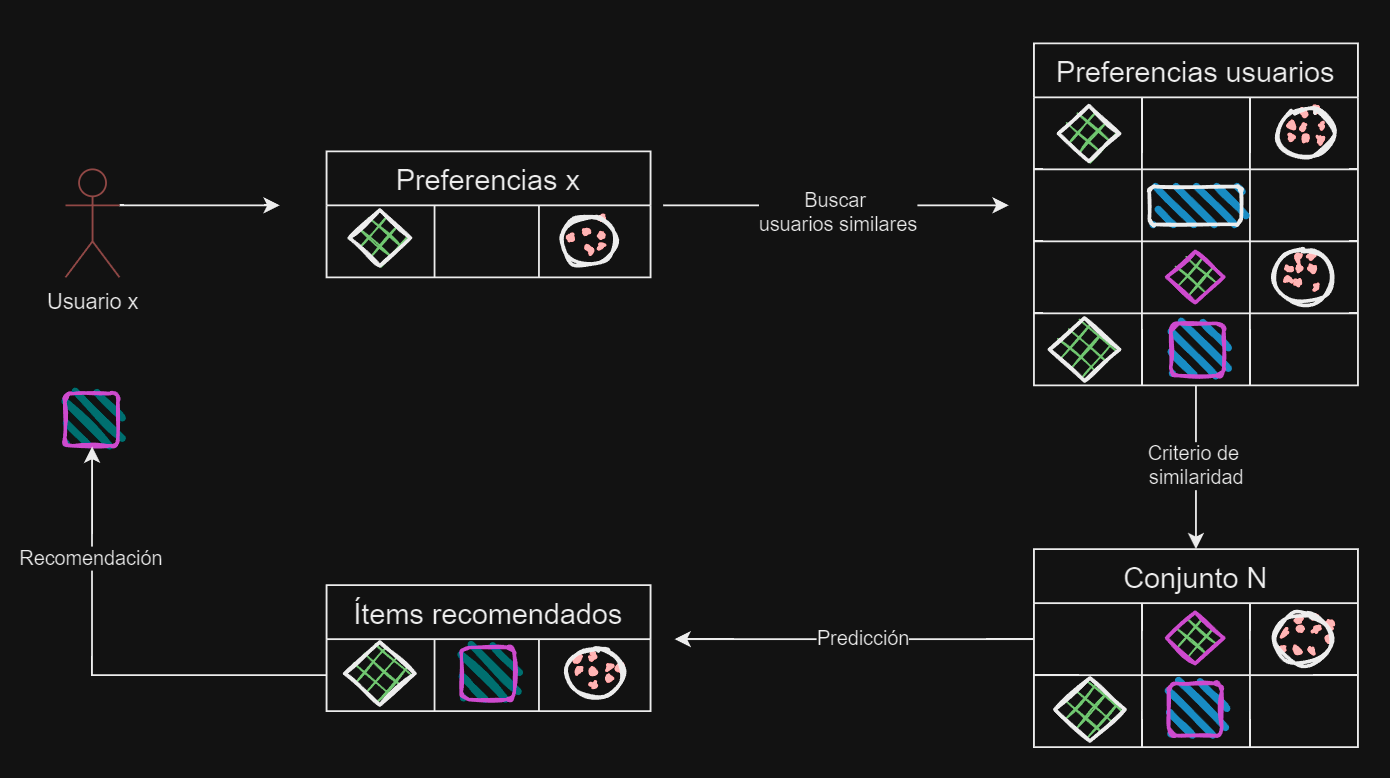



## La matriz de utilidad

La matriz de utilidad juega un papel crucial para las predicciones

|       | Inception | Batman Begins | Dunkirk |  Matrix | Saving Private Ryan | Schindler's List | Jurassic Park |
|:-----:|:---------:|:-------------:|:------:|:-------------------:|:-------:|:-------:|:-------:|
| Alice | 4 |   | | 5| 1 | | |
|  Bob  | 5 | 5| 4  | |   | | |
| Carol |   |   |  |2 |4|5 | |
| David |   | 3  ||   |   | |3 |

1. Dados dos usuarios $x$ y $y$ con $r_x$ y $r_y$ el vector de ratings.
1. Buscamos una métrica que nos diga qué tan parecidos son $sim(x, y)$
1. Por ejemplo, la intuición es que $sim(Alice, Bob) > sim(Alice, Carol)$

## Implementación ingenua: Distancia Jaccard

El problema principal es cómo lidiar con los valores faltantes

|       | Inception | Batman Begins | Dunkirk |  Matrix | Saving Private Ryan | Schindler's List | Jurassic Park |
|:-----:|:---------:|:-------------:|:------:|:-------------------:|:-------:|:-------:|:-------:|
| Alice | 4 |   | | 5| 1 | | |
|  Bob  | 5 | 5| 4  | |   | | |
| Carol |   |   |  |2 |4|5 | |
| David |   | 3  ||   |   | |3 |

La manera más sencilla e intuitiva es usando la similaridad Jaccard

$$J(A, B) = \frac{|r_A \cap r_B|}{|r_A \cup r_B|}$$

En nuestro ejemplo entonces:

$$sim(Alice, Bob) = \frac{1}{5}$$ y además $$sim(Alice, Carol) = \frac{2}{4}$$

Que es completamente contradictorio con la noción de similaridad que nos pueden dar los ratings.

1. Qué sucede?
1. Problema con este enfoque?


## Nuestra métrica de similaridad

Usaremos la métrica de la distancia del coseno.

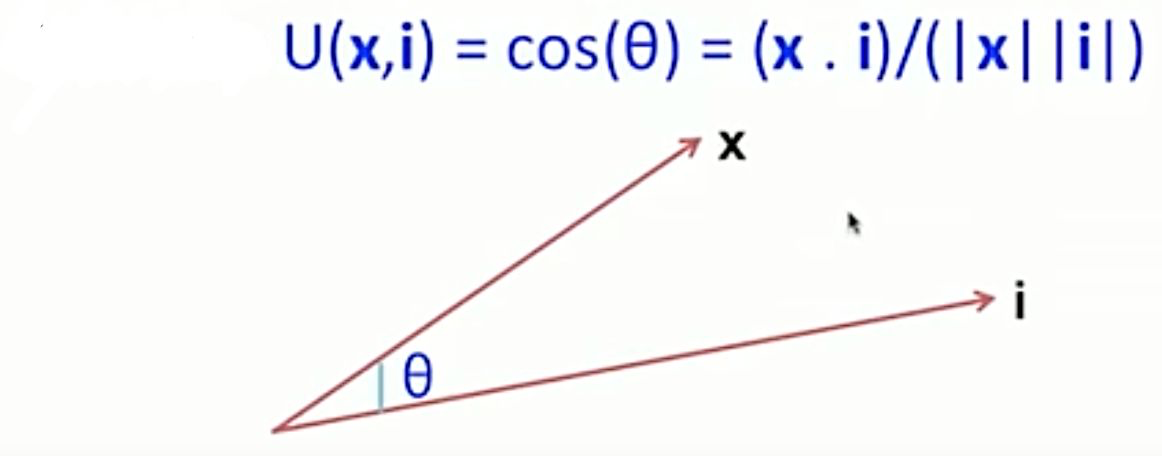

### Intuición

Ahora diremos que la distancia entre $r_x$ y $r_y$ será el coseno del ángulo entre los dos vectores

|       | Inception | Batman Begins | Dunkirk |  Matrix | Saving Private Ryan | Schindler's List | Jurassic Park |
|:-----:|:---------:|:-------------:|:------:|:-------------------:|:-------:|:-------:|:-------:|
| Alice | 4 |   | | 5| 1 | | |
|  Bob  | 5 | 5| 4  | |   | | |
| Carol |   |   |  |2 |4|5 | |
| David |   | 3  ||   |   | |3 |


1. Los valores faltantes los llenamos con ceros

In [126]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd

# Data from the Markdown table
data = {
    "Inception": {"Alice": 4, "Bob": 5, "Carol": None, "David": None, "Fernando": 5},
    "Batman Begins": {"Alice": None, "Bob": 5, "Carol": None, "David": 3, "Fernando": 5},
    "Dunkirk": {"Alice": None, "Bob": 4, "Carol": None, "David": 1, "Fernando": 5},
    "Matrix": {"Alice": 5, "Bob": None, "Carol": 2, "David": None, "Fernando": 2},
    "Saving Private Ryan": {"Alice": 1, "Bob": None, "Carol": 4, "David": None, "Fernando": None},
    "Schindler's List": {"Alice": None, "Bob": None, "Carol": 5, "David": None, "Fernando": 5},
    "Jurassic Park": {"Alice": None, "Bob": None, "Carol": None, "David": 3, "Fernando": 3}
}

In [127]:
# Creating the DataFrame
df = pd.DataFrame(data)

df

Inception  Batman Begins  Dunkirk  Matrix  Saving Private Ryan  \
Alice           4.0            NaN      NaN     5.0                  1.0   
Bob             5.0            5.0      4.0     NaN                  NaN   
Carol           NaN            NaN      NaN     2.0                  4.0   
David           NaN            3.0      1.0     NaN                  NaN   
Fernando        5.0            5.0      5.0     2.0                  NaN   

          Schindler's List  Jurassic Park  
Alice                  NaN            NaN  
Bob                    NaN            NaN  
Carol                  5.0            NaN  
David                  NaN            3.0  
Fernando               5.0            3.0

Rellenamos de ceros las entradas

In [128]:
df.fillna(0)

Inception  Batman Begins  Dunkirk  Matrix  Saving Private Ryan  \
Alice           4.0            0.0      0.0     5.0                  1.0   
Bob             5.0            5.0      4.0     0.0                  0.0   
Carol           0.0            0.0      0.0     2.0                  4.0   
David           0.0            3.0      1.0     0.0                  0.0   
Fernando        5.0            5.0      5.0     2.0                  0.0   

          Schindler's List  Jurassic Park  
Alice                  0.0            0.0  
Bob                    0.0            0.0  
Carol                  5.0            0.0  
David                  0.0            3.0  
Fernando               5.0            3.0

In [129]:
df_zeros = df.fillna(0)

In [130]:
df_zeros.loc["Alice"].values.reshape(1, -1)

array([[4., 0., 0., 5., 1., 0., 0.]])

In [131]:
def distance(x, y, d, df):
  return d(df.loc[x].values.reshape(1, -1), df.loc[y].values.reshape(1, -1))[0][0]

In [132]:
distance("Alice", "Bob", cosine_similarity, df_zeros)

0.3798685881987931

In [133]:
distance("Alice", "Carol", cosine_similarity, df_zeros)

0.3220305943597653

Si buscamos medir la similaridad $$sim(Alice, Bob) = 0.38$$ y además $$sim(Alice, Carol) = 0.32$$

Las similaridades ahora tienen más sentido pero no por mucho.

1. Cómo podríamos arreglarla?
1. qué está pasando?


## Normalizando por filas

Usaremos la distancia central del coseno y queremos normalizar por filas




In [134]:
(df.T-df.T.mean()).fillna(0).T

Inception  Batman Begins   Dunkirk    Matrix  Saving Private Ryan  \
Alice      0.666667       0.000000  0.000000  1.666667            -2.333333   
Bob        0.333333       0.333333 -0.666667  0.000000             0.000000   
Carol      0.000000       0.000000  0.000000 -1.666667             0.333333   
David      0.000000       0.666667 -1.333333  0.000000             0.000000   
Fernando   0.833333       0.833333  0.833333 -2.166667             0.000000   

          Schindler's List  Jurassic Park  
Alice             0.000000       0.000000  
Bob               0.000000       0.000000  
Carol             1.333333       0.000000  
David             0.000000       0.666667  
Fernando          0.833333      -1.166667

### Normalizando por filas

In [135]:
df_mean = (df.T-df.T.mean()).T.fillna(0)

In [136]:
df_mean

Inception  Batman Begins   Dunkirk    Matrix  Saving Private Ryan  \
Alice      0.666667       0.000000  0.000000  1.666667            -2.333333   
Bob        0.333333       0.333333 -0.666667  0.000000             0.000000   
Carol      0.000000       0.000000  0.000000 -1.666667             0.333333   
David      0.000000       0.666667 -1.333333  0.000000             0.000000   
Fernando   0.833333       0.833333  0.833333 -2.166667             0.000000   

          Schindler's List  Jurassic Park  
Alice             0.000000       0.000000  
Bob               0.000000       0.000000  
Carol             1.333333       0.000000  
David             0.000000       0.666667  
Fernando          0.833333      -1.166667

In [137]:
distance("Alice", "Bob", cosine_similarity, df_mean)

0.09245003270420474

In [138]:
distance("Alice", "Carol", cosine_similarity, df_mean)

-0.5590852462516896

En resumen ahora:

1. Los ratings que **no** tenemos son considerados average
1. Maneja por igual **usuarios difíciles** con **usuarios fáciles**

## Predicción

Imaginemos que para el usuario $x$ queremos predecir (porque no tenemos) $r_xi$

1. Dado un usuario base $x$, conseguir el conjunto $N$ de otros usuarios cuyos ratings sobre productos sea "similar" a los ratings de $x$.
1. Estimar los ratings faltantes de $x$ usando los ratings de $N$

A qué se parece?

$$r_{xi} = \frac{1}{k} \sum_{y \in N} r_{yi}$$ con

- $r_x$ el vector de ratings de x
- $N$ el conjunto de los $k$ usuarios más similares a $x$ que tienen rating en $i$

## Opción normalizada?:

$$r_{xi} = \frac{\sum_{y \in N} s_{xy}r_{yi}}{\sum_{y \in N} s_{xy}} $$ con

- $r_x$ el vector de ratings de x
- $N$ el conjunto de los $k$ usuarios más similares a $x$ que tienen rating en $i$
- Qué es $s_{xy}$?



In [139]:
df_mean

Inception  Batman Begins   Dunkirk    Matrix  Saving Private Ryan  \
Alice      0.666667       0.000000  0.000000  1.666667            -2.333333   
Bob        0.333333       0.333333 -0.666667  0.000000             0.000000   
Carol      0.000000       0.000000  0.000000 -1.666667             0.333333   
David      0.000000       0.666667 -1.333333  0.000000             0.000000   
Fernando   0.833333       0.833333  0.833333 -2.166667             0.000000   

          Schindler's List  Jurassic Park  
Alice             0.000000       0.000000  
Bob               0.000000       0.000000  
Carol             1.333333       0.000000  
David             0.000000       0.666667  
Fernando          0.833333      -1.166667

In [142]:
pd.DataFrame(cosine_similarity(df_mean))

0             1         2         3             4
0  1.000000  9.245003e-02 -0.559085  0.000000 -3.492222e-01
1  0.092450  1.000000e+00  0.000000  0.833333 -3.129200e-16
2 -0.559085  0.000000e+00  1.000000  0.000000  7.354967e-01
3  0.000000  8.333333e-01  0.000000  1.000000 -2.747211e-01
4 -0.349222 -3.129200e-16  0.735497 -0.274721  1.000000e+00

In [140]:
cosine_similarity(df_zeros)

array([[1.        , 0.37986859, 0.32203059, 0.        , 0.43546914],
       [0.37986859, 1.        , 0.        , 0.53654337, 0.81056314],
       [0.32203059, 0.        , 1.        , 0.        , 0.40667972],
       [0.        , 0.53654337, 0.        , 1.        , 0.62586689],
       [0.43546914, 0.81056314, 0.40667972, 0.62586689, 1.        ]])